In [74]:
import pandas as pd
import pickle
import numpy as np
import librosa as lib
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from scipy.spatial.distance import cdist, pdist
from sklearn.preprocessing import StandardScaler

In [2]:
!pip install shap -qq

In [3]:
data = pd.read_csv('/home/alison/Documentos/Projeto-Tomate/datasets_especies/dataset_especies_mfcc.csv', sep=',')

In [4]:
colunas = list(data.columns)
colunas.pop(0)
colunas.pop()
colunas.pop()
colunas[:5]

['mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5']

In [5]:
data.head(21)

,filename,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc33,mfcc34,mfcc35,mfcc36,mfcc37,mfcc38,mfcc39,mfcc40,Annotation,label
0,10.WAV,-187.834915,49.854252,-6.525051,4.707772,1.334116,1.693677,6.264961,2.519773,1.206058,...,0.444205,2.252861,0.985763,1.885565,-0.026572,-0.801063,-0.571089,-0.822223,vibra_flor_1,Augochloropsis_sp1
1,10.WAV,-211.676758,48.164745,-1.568784,3.710127,-3.730522,-3.279997,-0.343598,-0.073257,0.746383,...,-1.024178,-0.240914,-0.574752,-0.193956,-0.603252,0.036737,-0.689467,0.040395,vibra_flor_1,Augochloropsis_sp1
2,10.WAV,-232.696899,81.410210,37.018658,20.403471,16.442812,14.575477,11.206918,6.474152,6.047267,...,1.250340,0.958684,-0.131907,-0.131134,-0.765925,-0.879593,-0.483463,-0.753808,voo,Augochloropsis_sp1
3,91.WAV,-185.587082,73.079796,8.960753,14.774915,6.392628,13.652942,10.269503,3.991142,4.798811,...,-1.759427,-1.076507,-2.575743,-1.058758,-0.872088,0.383461,0.684918,0.585753,vibra_flor_1,Augochloropsis_sp1
4,72_90.WAV,-255.555954,62.533112,9.300890,6.245489,11.985186,10.531092,11.661766,4.740428,4.567764,...,2.895166,2.551942,0.574672,0.654496,-1.118530,-0.480824,-0.293434,0.013918,voo,Augochloropsis_sp1
5,72_90.WAV,-280.146057,54.297955,7.884189,6.636130,13.497029,9.726294,9.289383,3.105898,4.357107,...,1.844157,2.435470,0.461845,0.614008,-0.651013,-0.623990,-0.736763,-0.212305,voo,Augochloropsis_sp1
6,72_90.WAV,-259.030487,73.004448,25.110809,10.794285,16.821297,7.349238,8.206959,3.186376,3.754220,...,4.154097,4.041371,0.496710,0.165084,-1.600423,-1.357489,-1.568777,-0.486081,voo,Augochloropsis_sp1
7,72_90.WAV,-218.155014,48.403866,6.250520,-3.652588,8.985928,19.618826,14.956874,5.807299,10.039868,...,-0.659059,-0.240790,-1.464753,0.311305,-0.457829,-0.008502,-0.088560,0.801075,vibra_flor_1,Augochloropsis_sp1
8,72_90.WAV,-186.768906,48.887505,0.103864,3.788666,9.144697,8.066632,11.703191,1.804448,5.678720,...,-1.317699,-0.210712,-1.368031,0.017372,-0.690326,0.355729,0.023349,-0.018323,vibra_flor_1,Augochloropsis_sp1
9,72_90.WAV,-178.861465,47.768433,0.837430,1.780555,12.437180,11.894061,13.695146,-0.232753,2.971830,...,-1.630589,-1.426080,-2.308808,-0.749616,-1.121525,-0.069057,-0.442101,-0.434415,vibra_flor_1,Augochloropsis_sp1


In [6]:
dados = data
dados = dados.drop(['filename', 'Annotation'],axis=1)
#dados['Annotation'] = dados['Annotation'].replace(['vibra_flor_1', 'vibra_flor_2', 'vibra_flor_3', 'vibra_flor_4'], 'sonication')
#dados['Annotation'] = dados['Annotation'].replace(['voo'], 'interflower')
classes = dados.iloc[:, -1]
standard = StandardScaler()
matriz = standard.fit_transform(np.array(dados.iloc[:, :-1]))
X_train, X_test, y_train, y_test = train_test_split(matriz, classes, test_size=0.5, random_state=0)

In [7]:
target_names = data.label.unique()
target_names

array(['Augochloropsis_sp1', 'Augochloropsis_sp2',
       'Augochloropsis_brachycephala', 'Bombus_morio',
       'Bombus_pauloensis', 'Centris_tarsata', 'Centris_trigonoides',
       'Eulaema_nigrita', 'Exomalopsis_analis', 'Exomalopsis_minor',
       'Melipona_bicolor', 'Melipona_quadrifasciata',
       'Pseudoalglochloropsis_graminea', 'Xylocopa_nigrocincta',
       'Xylocopa_suspecta'], dtype=object)

In [125]:
stan = StandardScaler()

especies = []
euclidiano = []
similaridade = []
distancia = []
d = data.drop(['filename', 'Annotation', 'label'],axis=1)
stan.fit(d)
for target in target_names:
    df_flor = data[(data['label'] == target) & (data['Annotation'] != 'voo')]
    df_voo  = data[(data['label'] == target) & (data['Annotation'] == 'voo')]
    flor = df_flor.drop(['filename','Annotation', 'label'], axis=1).reset_index(drop=True)
    voo  = df_voo.drop(['filename','Annotation', 'label'], axis=1).reset_index(drop=True)

    euclidian_dis = []
    cos_sim = []
    corr = []
    for i in range(flor.shape[0]):
        f = list(flor.iloc[i])
        #f = stan.transform([f])
        for j in range(voo.shape[0]):
            v = list(voo.iloc[j])
            #v = stan.transform([v])
            #e = np.linalg.norm(np.array(f) - np.array(v))
            e = distance.euclidean(f, v)
            e = 1 / (1+e)
            d = distance.correlation(f, v)
            c = cosine_similarity(np.array(f).reshape(1, -1), np.array(v).reshape(1, -1))

            euclidian_dis.append(e)
            cos_sim.append(d)
            corr.append(c)
    
    especies.append(target)
    euclidiano.append(np.mean(euclidian_dis))
    similaridade.append(np.mean(cos_sim))
    distancia.append(np.mean(corr))

In [132]:
df = pd.DataFrame(None, columns=['Espécies', 'Euclidean Distances', 'Cosine Similarity'])
df['Espécies'] = especies
df['Euclidean Distances'] = euclidiano
df['Cosine Similarity'] = similaridade
#df['Correlation Distance'] = distancia
df

,Espécies,Euclidean Distances,Cosine Similarity
0,Augochloropsis_sp1,0.013200,0.023534
1,Augochloropsis_sp2,0.017603,0.039440
2,Augochloropsis_brachycephala,0.010428,0.040044
3,Bombus_morio,0.011105,0.057735
4,Bombus_pauloensis,0.017084,0.027909
5,Centris_tarsata,0.020636,0.019409
6,Centris_trigonoides,0.026503,0.013312
7,Eulaema_nigrita,0.018542,0.033209
8,Exomalopsis_analis,0.010735,0.076811
9,Exomalopsis_minor,0.016834,0.021013


In [133]:
df.describe()

,Euclidean Distances,Cosine Similarity
count,15.000000,15.000000
mean,0.016520,0.033440
std,0.004137,0.015985
min,0.010428,0.013312
25%,0.014402,0.024963
50%,0.016834,0.027909
75%,0.018072,0.037796
max,0.026503,0.076811


In [135]:
round(0.016520, 3)

0.017

In [10]:
svm_file = '/home/alison/Documentos/Projeto-Tomate/modelos/modelo_svm_mfcc_ambos.sav'
svm_model = pickle.load(open(svm_file, 'rb'))

lr_file = '/home/alison/Documentos/Projeto-Tomate/modelos/modelo_lr_mfcc_ambos.sav'
lr_model = pickle.load(open(lr_file, 'rb'))

rf_file = '/home/alison/Documentos/Projeto-Tomate/modelos/modelo_rf_mfcc_ambos.sav'
rf_model = pickle.load(open(rf_file, 'rb'))

dtree_file = '/home/alison/Documentos/Projeto-Tomate/modelos/modelo_dtree_mfcc_ambos.sav'
dtree_model = pickle.load(open(dtree_file, 'rb'))

ens_file = '/home/alison/Documentos/Projeto-Tomate/modelos/modelo_ensemble_mfcc_ambos.sav'
ens_model = pickle.load(open(ens_file, 'rb'))

# Feature importance do LR

In [28]:
lr_importance = lr_model.best_estimator_.coef_
pd.set_option('display.max_columns', 42)
dflr = pd.DataFrame(lr_importance, index=list(lr_model.best_estimator_.classes_))
dflr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
Augochloropsis_brachycephala,0.173128,-0.455164,0.086167,0.843588,0.383964,0.184847,0.476194,0.138835,-0.062870,0.596835,0.648189,-0.335775,-0.028394,-0.021835,-0.060631,-0.079100,0.439202,-0.163445,-0.487229,0.565701,-0.526546,-0.035918,0.005080,0.261166,0.285514,0.340499,0.468725,-0.072927,0.159212,0.373648,-0.341475,0.386664,-0.543442,-0.949373,-0.643917,-0.715262,-0.509919,-0.859125,0.037422,-0.880808,-0.191978,-0.237151
Augochloropsis_sp1,-0.012370,0.446002,-1.670931,0.839677,-1.404592,-0.475870,0.447050,0.852891,-0.701685,0.990936,-0.644362,1.692243,1.481176,2.272416,-0.567465,-0.411484,1.686721,-1.839461,0.886807,-1.223101,-0.129866,0.381329,0.376356,1.737170,-0.420449,0.924043,-0.089556,-1.320801,1.445173,0.304029,-0.054856,-0.679565,1.087262,-0.500880,0.452563,0.380938,-2.234446,-1.303032,-0.106323,-0.589935,-0.203337,-1.258450
Augochloropsis_sp2,0.380157,0.641512,-0.792568,0.393246,-0.114547,-0.342384,0.132135,-0.333903,-1.337949,-0.279039,-0.112503,-1.050762,-0.315938,-0.589494,0.178283,-0.943977,0.135912,-0.358690,-0.486265,0.790275,-0.918890,0.077231,0.302254,-0.551331,0.692027,-0.310589,0.588800,-0.099694,0.321584,-0.015050,-0.349815,0.885926,-0.160323,-0.370448,-0.105564,-0.099008,-0.321092,-0.059996,1.178022,-1.050083,-0.052887,-0.025427
Bombus_morio,-0.053359,-0.159575,0.318536,-0.442935,-0.191316,-0.701257,-1.141143,-0.825008,-1.090422,-0.836557,-1.247520,-0.059931,-0.481372,0.189405,0.177450,0.993733,-0.707391,0.576466,-0.272599,-0.985313,-0.518365,0.047312,-0.046185,0.254412,-0.147715,-0.550731,-0.237070,-0.236327,0.468990,0.586527,0.856039,-0.036784,0.468486,0.428064,0.435233,0.338894,0.987452,0.650292,1.185945,0.139925,1.125397,2.089581
Bombus_pauloensis,-0.031483,0.364431,0.617622,0.964734,0.905309,-0.105222,-0.478323,-0.746050,1.008386,-0.284042,-0.777430,-1.591056,0.832951,-0.060044,0.429641,0.279563,-0.338616,-0.618249,1.130424,-0.912759,1.081169,-0.422693,-0.563823,0.267071,-0.054859,-0.302853,0.420168,0.481215,-1.457458,-0.911259,-0.155234,-0.946864,-1.272355,-0.674095,-2.360207,-0.023806,1.733924,0.572107,-0.014341,0.572115,0.556437,2.439347
Centris_tarsata,-0.439075,-0.513219,1.406410,-0.177981,-0.331899,0.510319,0.321958,-0.113307,1.193455,0.543981,0.557143,0.415898,-0.035251,0.355566,-0.633680,-1.221707,-0.028963,0.711732,-1.041437,0.072349,-0.313100,0.048503,-0.463384,0.162341,0.511365,1.306396,-1.107346,1.518263,-1.518239,-0.322535,-0.386280,-0.751733,-0.144508,0.765279,0.033439,1.038537,-0.632419,0.211485,-0.628206,0.584145,0.128120,0.634242
Centris_trigonoides,-0.510458,0.585143,0.980618,-0.134993,0.864640,-0.451926,0.465862,1.247731,-0.267460,0.275100,0.087298,0.829733,0.404437,-0.853775,0.444773,1.290770,-0.537534,-0.503137,1.094301,-0.115944,0.097298,0.522041,0.852491,0.606709,-0.170708,0.474411,0.345138,-0.490121,-0.502537,0.015237,-0.177759,-0.446057,-0.349002,0.093486,0.783701,-0.096281,0.924108,0.619812,-0.238528,-0.373562,-0.092698,0.683077
Eulaema_nigrita,1.338897,0.799876,-0.657058,0.246638,0.357675,-0.329557,-0.329095,0.428717,0.577351,-0.421483,0.505717,0.116400,-0.088257,-0.018489,-0.749334,0.606889,-0.108492,-0.701108,-0.008890,-0.224928,-0.605869,-0.515971,0.497441,-0.064137,-0.480151,0.418081,0.423053,-0.127753,0.314106,0.574564,0.237642,-0.374536,0.153037,0.002563,-0.055653,-0.299611,-0.536229,0.198468,-0.134595,0.096241,1.852738,-0.066588
Exomalopsis_analis,1.218485,-2.292361,0.915936,-0.484240,-1.034337,-0.558056,-1.374624,-0.372982,-0.685735,-0.156209,2.117514,-0.685558,-2.170947,2.731470,-0.529818,3.066801,-2.033328,0.810742,-2.239813,-0.165567,-1.312493,-0.212478,0.432462,-1.071403,-0.325931,0.311949,0.197485,1.379440,-0.770911,2.578695,1.021391,-0.335121,0.888557,0.490061,-1.096736,-0.747795,-0.255309,0.632938,-0.973730,-0.710219,-1.540853,-2.460929
Exomalopsis_minor,-0.548170,-0.894944,0.113148,-1.470189,0.225973,1.181662,-1.222963,1.239602,0.698469,-0.

In [30]:
predict_sonication = data[data.Annotation != 'voo'].groupby(data.label).count()[['Annotation']]
predict_sonication['Total'] = data.Annotation.groupby(data.label).count()
predict_sonication['Interflower'] = predict_sonication.Total - predict_sonication.Annotation
predict_sonication['OddsOfSonication'] = predict_sonication.Annotation / predict_sonication.Interflower
predict_sonication['ProbOfSonication'] = predict_sonication.Annotation / predict_sonication.Total
predict_sonication['Log(OddsOfSonication)'] = np.log(predict_sonication.OddsOfSonication)
predict_sonication

,Annotation,Total,Interflower,OddsOfSonication,ProbOfSonication,Log(OddsOfSonication)
label,,,,,,
Augochloropsis_brachycephala,3,4,1,3.000000,0.750000,1.098612
Augochloropsis_sp1,11,20,9,1.222222,0.550000,0.200671
Augochloropsis_sp2,12,14,2,6.000000,0.857143,1.791759
Bombus_morio,19,28,9,2.111111,0.678571,0.747214
Bombus_pauloensis,15,26,11,1.363636,0.576923,0.310155
Centris_tarsata,2,8,6,0.333333,0.250000,-1.098612
Centris_trigonoides,3,11,8,0.375000,0.272727,-0.980829
Eulaema_nigrita,2,4,2,1.000000,0.500000,0.000000
Exomalopsis_analis,63,74,11,5.727273,0.851351,1.745239


In [22]:
predict_interflower = data[data.Annotation == 'voo'].groupby(data.label).count()[['Annotation']]
predict_interflower['Total'] = data.Annotation.groupby(data.label).count()
predict_interflower['Sonication'] = predict_interflower.Total - predict_interflower.Annotation
predict_interflower['OddsOfInterflower'] = predict_interflower.Annotation / predict_interflower.Sonication
predict_interflower['ProbOfInterflower'] = predict_interflower.Annotation / predict_interflower.Total
predict_interflower['Log(OddsOfInterflower)'] = np.log(predict_interflower.OddsOfInterflower)
predict_interflower

,Annotation,Total,Sonication,OddsOfInterflower,ProbOfInterflower,Log(OddsOfInterflower)
label,,,,,,
Augochloropsis_brachycephala,1,4,3,0.333333,0.250000,-1.098612
Augochloropsis_sp1,9,20,11,0.818182,0.450000,-0.200671
Augochloropsis_sp2,2,14,12,0.166667,0.142857,-1.791759
Bombus_morio,9,28,19,0.473684,0.321429,-0.747214
Bombus_pauloensis,11,26,15,0.733333,0.423077,-0.310155
Centris_tarsata,6,8,2,3.000000,0.750000,1.098612
Centris_trigonoides,8,11,3,2.666667,0.727273,0.980829
Eulaema_nigrita,2,4,2,1.000000,0.500000,0.000000
Exomalopsis_analis,11,74,63,0.174603,0.148649,-1.745239


# Feature importance do DTree

In [36]:
importance_dtree = dtree_model.best_estimator_.feature_importances_
importance_dtree

array([0.        , 0.        , 0.        , 0.00954417, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07982508, 0.        , 0.00581816, 0.00899955, 0.        ,
       0.        , 0.        , 0.02095604, 0.        , 0.01881529,
       0.00742567, 0.        , 0.        , 0.        , 0.        ,
       0.02954673, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0184696 , 0.        , 0.        ,
       0.00581816, 0.        , 0.        , 0.        , 0.01844098,
       0.52072045, 0.25562012])

# Feature importance do RF

In [13]:
rf_importance = rf_model.best_estimator_.feature_importances_
importances = {}
importances['feature'] = []
importances['coef'] = []
for i,v in enumerate(rf_importance):
    #print("Feature {} -> Score: {}".format(i, v))
    importances['feature'].append(i+1)
    importances['coef'].append(v)

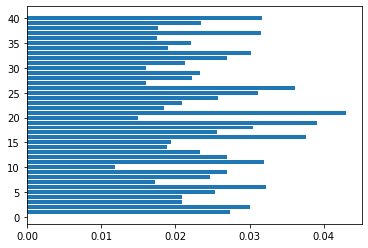

In [14]:
plt.barh(importances['feature'], importances['coef'])
plt.show()

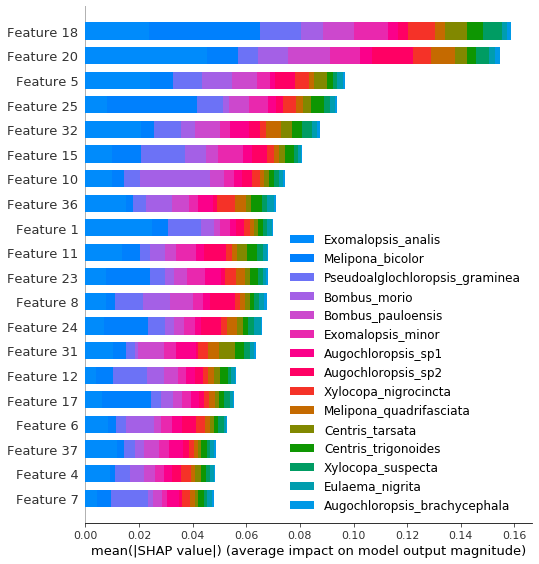

In [15]:
import shap
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_features="auto")
rf.fit(X_train, y_train)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, class_names=rf.classes_)